In [73]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [195]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
a = [i for i in range(1930, 2019, 4)]

In [3]:
file = []
for i in a:
    file.append(f"FIFA - {i}.csv")

In [4]:
#遇世界大戰不踢球
file.remove('FIFA - 1942.csv')
file.remove('FIFA - 1946.csv')

In [5]:
df = pd.concat(map(pd.read_csv, file))

In [67]:
df.isnull().sum()

Position           0
Team               0
Games Played       0
Win                0
Draw               0
Loss               0
Goals For          0
Goals Against      0
Goal Difference    0
Points             0
dtype: int64

In [64]:
df[df['Team'] == 'Japan']	

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
30,31,Japan,3,0,0,3,1,4,−3,0
8,9,Japan,4,2,1,1,5,3,2,7
27,28,Japan,3,0,1,2,2,7,−5,1
8,9,Japan,4,2,1,1,4,2,2,7
28,29,Japan,3,0,1,2,2,6,−4,1
15,16,Japan,4,1,1,2,6,7,−1,4


In [66]:
df[df['Team'] == 'England']

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
7,8,England,3,1,0,2,2,2,0,2
6,7,England,3,1,1,1,8,8,0,3
10,11,England,4,0,3,1,4,5,−1,3
7,8,England,4,1,1,2,5,6,−1,3
0,1,England,6,5,1,0,11,3,8,11
7,8,England,4,2,0,2,4,4,0,4
5,6,England,5,3,2,0,6,1,5,8
7,8,England,5,2,1,2,7,3,4,5
3,4,England,7,3,3,1,8,6,2,9
8,9,England,4,2,1,1,7,4,3,7


In [119]:
#point意義未明
features = ['Games Played','Win','Draw','Loss','Goals For','Goals Against']

In [244]:
df_team = df.groupby('Team').sum()
df_team = df_team.reset_index()

In [245]:
df_team

,Team,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Points
0,Algeria,77,13,3,3,7,13,19,10
1,Angola,23,3,0,2,1,1,2,2
2,Argentina,124,81,43,15,23,137,93,120
3,Australia,108,16,2,4,10,13,31,10
4,Austria,78,29,12,4,13,43,47,28
...,...,...,...,...,...,...,...,...,...
81,Uruguay,122,56,24,12,20,87,74,69
82,Wales,5,5,1,3,1,4,4,5
83,West Germany,29,62,36,14,12,131,77,86
84,Yugoslavia,57,33,14,7,12,55,42,35


In [246]:
#卡達為首次參賽
df_team.loc[len(df_team.index)] = ['Qatar',0, 0, 0, 0 ,0,0,0,0]

In [247]:
#把西德數據統整到德國中

df_team['Team'].iloc[83] = 'Germany'

In [248]:
df_team[df_team['Team']== 'Germany']

,Team,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Points
30,Germany,53,47,31,6,10,95,48,96
83,Germany,29,62,36,14,12,131,77,86


In [251]:
#把兩組德國數據合併
df_team = df_team.groupby('Team').sum()
df_team = df_team.reset_index()

In [252]:
df_team[df_team['Team']== 'Germany']

,Team,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Points
30,Germany,82,109,67,20,22,226,125,182


In [253]:
df_team

,Team,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Points
0,Algeria,77,13,3,3,7,13,19,10
1,Angola,23,3,0,2,1,1,2,2
2,Argentina,124,81,43,15,23,137,93,120
3,Australia,108,16,2,4,10,13,31,10
4,Austria,78,29,12,4,13,43,47,28
...,...,...,...,...,...,...,...,...,...
81,United States,158,33,8,6,19,37,62,27
82,Uruguay,122,56,24,12,20,87,74,69
83,Wales,5,5,1,3,1,4,4,5
84,Yugoslavia,57,33,14,7,12,55,42,35


In [254]:
df_team.describe()

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Points
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,66.860465,20.906977,8.139535,4.627907,8.139535,29.616279,29.616279,24.779070
std,46.489256,23.460920,13.536150,5.119850,6.433667,44.000312,27.053832,37.237363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.500000,4.000000,0.250000,1.000000,3.000000,4.000000,9.250000,3.000000
50%,61.500000,13.000000,3.000000,3.000000,6.000000,13.000000,20.500000,10.500000
75%,100.500000,29.750000,10.500000,6.000000,12.000000,36.500000,42.750000,28.750000
max,196.000000,109.000000,73.000000,21.000000,27.000000,229.000000,125.000000,193.000000


In [255]:
data = df_team[features].copy()

In [219]:
#壓縮每個欄的數據至1-10之間
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [220]:
data.describe()

,Games Played,Win,Draw,Loss,Goals For,Goals Against
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,2.726264,2.003504,2.983389,3.713178,2.163959,3.132372
std,1.937140,1.668840,2.194221,2.144556,1.729270,1.947876
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.330275,1.030822,1.428571,2.000000,1.157205,1.666000
50%,2.073394,1.369863,2.285714,3.000000,1.510917,2.476000
75%,3.456422,2.294521,3.571429,5.000000,2.434498,4.078000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [216]:
#隨機挑選k個數據點當起始點
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [17]:
#計算所有點與k個參考點的距離，將距離最近的歸給它
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [221]:
centroids

,0,1,2,3
Games Played,2.626639,6.952994,3.852233,1.447244
Win,1.597708,5.267929,2.649668,1.130319
Draw,2.994065,7.819531,3.746655,1.495255
Loss,4.251563,7.642047,5.673675,1.977408
Goals For,1.806818,5.589023,3.031625,1.188655
Goals Against,3.257603,7.061711,4.633449,1.699453
cluster,0.000000,1.245731,0.000000,2.000000


In [18]:
#對整個集群求幾何平均，求出新的參考點
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [222]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [20]:
#利用PCA將所有特徵濃縮成兩欄數據
#因為兩欄數據才能畫在平面上
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    
    clear_output(wait=True)
    
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

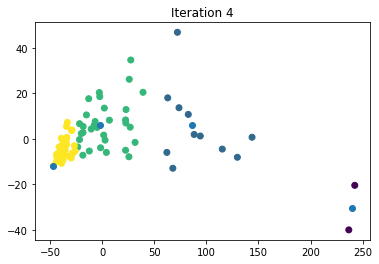

In [379]:
#持續迭代直到參考點不再變化或是達到預設的迭代次數
max_iterations = 100
k = 4

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [374]:
centroids

,1,2,3
Games Played,0.0,21.304944,63.599869
Win,0.0,5.782541,30.033551
Draw,0.0,4.633146,13.081770
Loss,0.0,9.874806,18.441169
Goals For,0.0,24.610616,105.749406
Goals Against,0.0,32.963730,77.148144


In [351]:
labels.value_counts()

1    41
2    32
3    11
0     2
dtype: int64

In [353]:
df_team[labels == 0][["Team"] + features]

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against
8,Brazil,109,73,18,18,229,105
30,Germany,109,67,20,22,226,125


In [354]:
#只看今年參賽的國家
wordcup2022 = ['Qatar','Ecuador','Senegal','Netherlands', 
               'England','Iran','United States','Wales', 'Argentina',
               'Saudi Arabia','Mexico','Poland', 'France',
               'Australia','Denmark','Tunisia', 'Spain','Costa Rica',
               'Germany','Japan','Belgium','Canada','Morocco','Croatia',
               'Brazil','Serbia','Switzerland','Cameroon', 
               'Portugal','Ghana','Uruguay','South Korea']
code = df_team['Team'].isin(wordcup2022)
filtered_df = df_team[code]

In [356]:
filtered_df[labels == 0][["Team"] + features]

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against
8,Brazil,109,73,18,18,229,105
30,Germany,109,67,20,22,226,125


In [355]:
filtered_df[labels == 3][["Team"] + features]

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against
2,Argentina,81,43,15,23,137,93
5,Belgium,48,20,9,19,68,72
27,England,69,29,21,19,91,64
29,France,66,34,13,19,120,77
45,Mexico,57,16,14,27,60,98
47,Netherlands,50,27,12,11,86,48
72,Spain,62,30,15,17,99,71
82,Uruguay,56,24,12,20,87,74


In [363]:
filtered_df[labels == 2][["Team"] + features]

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against
3,Australia,16,2,4,10,13,31
11,Cameroon,23,4,7,12,18,43
16,Costa Rica,18,5,5,8,19,28
17,Croatia,23,11,4,8,35,26
21,Denmark,20,9,5,6,30,26
31,Ghana,12,4,3,5,13,16
37,Iran,15,2,4,9,9,24
43,Japan,21,5,5,11,20,29
46,Morocco,16,2,5,9,14,22
56,Poland,34,16,5,13,46,45


In [357]:
filtered_df[labels == 1][["Team"] + features]

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against
12,Canada,3,0,0,3,0,5
24,Ecuador,10,4,1,5,10,11
58,Qatar,0,0,0,0,0,0
64,Senegal,8,3,3,2,11,10
65,Serbia,6,2,0,4,4,7
83,Wales,5,1,3,1,4,4


# Sklearn

In [470]:
data2 = df_team[features].copy()

In [471]:
data2

,Games Played,Win,Draw,Loss,Goals For,Goals Against
0,13,3,3,7,13,19
1,3,0,2,1,1,2
2,81,43,15,23,137,93
3,16,2,4,10,13,31
4,29,12,4,13,43,47
...,...,...,...,...,...,...
81,33,8,6,19,37,62
82,56,24,12,20,87,74
83,5,1,3,1,4,4
84,33,14,7,12,55,42


In [460]:
data2 = ((data2 - data2.min()) / (data2.max() - data2.min())) * 9 + 1

In [472]:
km = KMeans(n_clusters= 4)

In [475]:
# y_predict = km.fit_predict(data2)
# y_predict

In [474]:
c = pd.DataFrame(np.squeeze(km.cluster_centers_), columns=features)
c

,Games Played,Win,Draw,Loss,Goals For,Goals Against
0,6.520000,1.220000,1.660000,3.640000,5.760000,11.620000
1,59.454545,27.363636,13.454545,18.636364,94.727273,73.090909
2,26.086957,8.608696,5.608696,11.869565,33.130435,40.521739
3,109.000000,70.000000,19.000000,20.000000,227.500000,115.000000


In [463]:
l = get_labels(data2, c.T)
l

0     0
1     0
2     1
3     2
4     2
     ..
81    2
82    1
83    0
84    2
85    0
Length: 86, dtype: int64

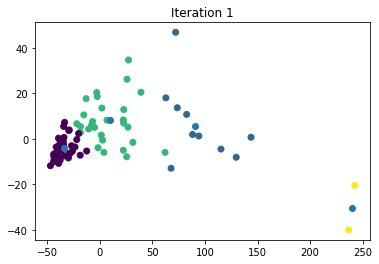

In [476]:
#兩邊結果幾乎一樣
plot_clusters(data, l, c.T, 1)

In [477]:
filtered_df = df_team[code]

In [478]:
#第一檔次
filtered_df[l == 3][["Team"] + features]

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against
8,Brazil,109,73,18,18,229,105
30,Germany,109,67,20,22,226,125


In [479]:
filtered_df[l == 1][["Team"] + features]

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against
2,Argentina,81,43,15,23,137,93
5,Belgium,48,20,9,19,68,72
27,England,69,29,21,19,91,64
29,France,66,34,13,19,120,77
45,Mexico,57,16,14,27,60,98
47,Netherlands,50,27,12,11,86,48
72,Spain,62,30,15,17,99,71
82,Uruguay,56,24,12,20,87,74


In [480]:
filtered_df[l == 2][["Team"] + features]

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against
3,Australia,16,2,4,10,13,31
11,Cameroon,23,4,7,12,18,43
16,Costa Rica,18,5,5,8,19,28
17,Croatia,23,11,4,8,35,26
21,Denmark,20,9,5,6,30,26
37,Iran,15,2,4,9,9,24
43,Japan,21,5,5,11,20,29
46,Morocco,16,2,5,9,14,22
56,Poland,34,16,5,13,46,45
57,Portugal,30,14,6,10,49,35


In [481]:
filtered_df[l == 0][["Team"] + features]

,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against
12,Canada,3,0,0,3,0,5
24,Ecuador,10,4,1,5,10,11
31,Ghana,12,4,3,5,13,16
58,Qatar,0,0,0,0,0,0
64,Senegal,8,3,3,2,11,10
65,Serbia,6,2,0,4,4,7
83,Wales,5,1,3,1,4,4


# Elbow Method

In [414]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data2[features])
    sse.append(km.inertia_) #sum of squared error

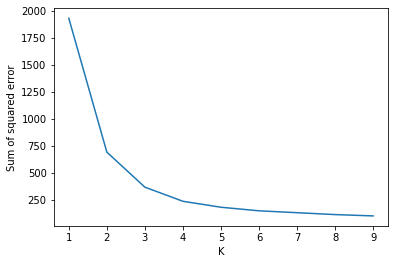

In [415]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [258]:
#壓縮至0-1
scaler = MinMaxScaler()
scaler.fit(data2)
data2 = scaler.transform(data2)